1. How many missing values are there in each column of the Video Games Sales dataset?
Display the results in a bar chart.

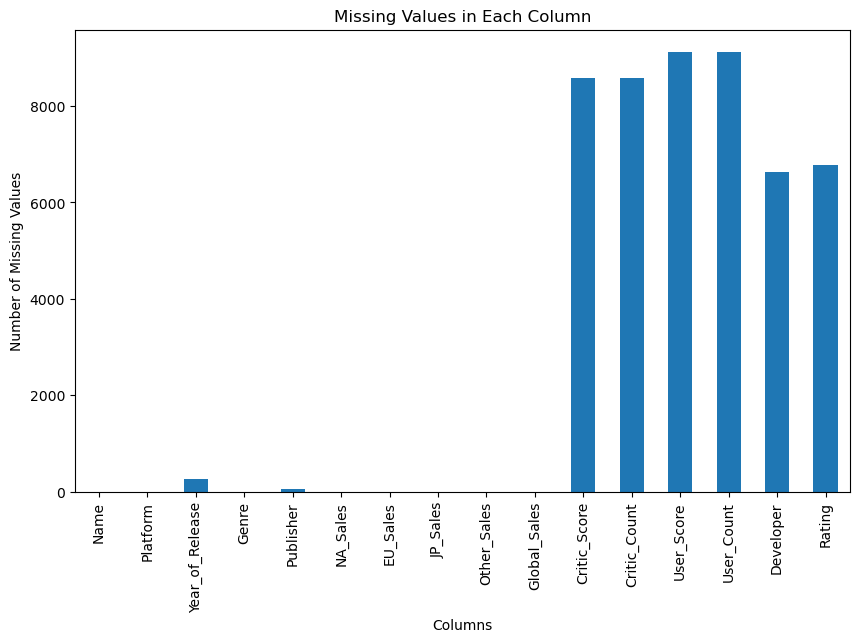

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

2. How can we handle missing values in the "Year_of_Release" column? Write a function
to fill in missing values with the median year and show the first 10 rows in the
dataframe.

In [20]:
def fill_missing_year_with_median(df):
    median_year = df['Year_of_Release'].median()
    df['Year_of_Release'].fillna(median_year, inplace=True)
    return df

df = fill_missing_year_with_median(df)
print(df.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0  Nintendo     41.36     28.96      3.77         8.45         82.53   
1  Nintendo     29.08      3.58      6.81         0.77         

C:\Users\sandh\AppData\Local\Temp\ipykernel_11616\542693744.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(median_year, inplace=True)


3. How does the distribution of video game genres look like in the dataset? Create a pie
chart to visualize the count of games in each genre.


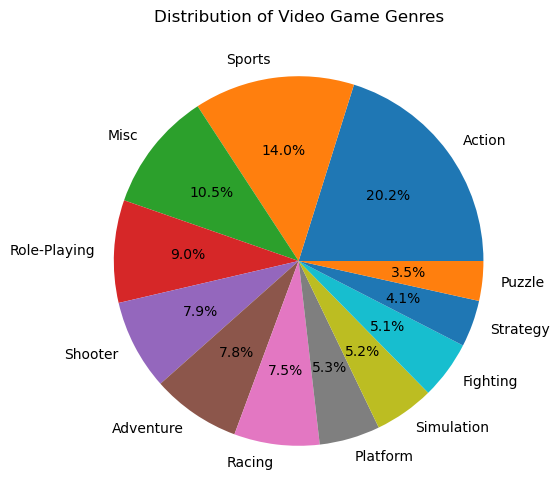

In [32]:
genre_counts = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Video Game Genres')
plt.ylabel('')
plt.show()

4. How does the distribution of critic scores vary by genre? Create a boxplot to visualize
the distribution of critic scores by genre.

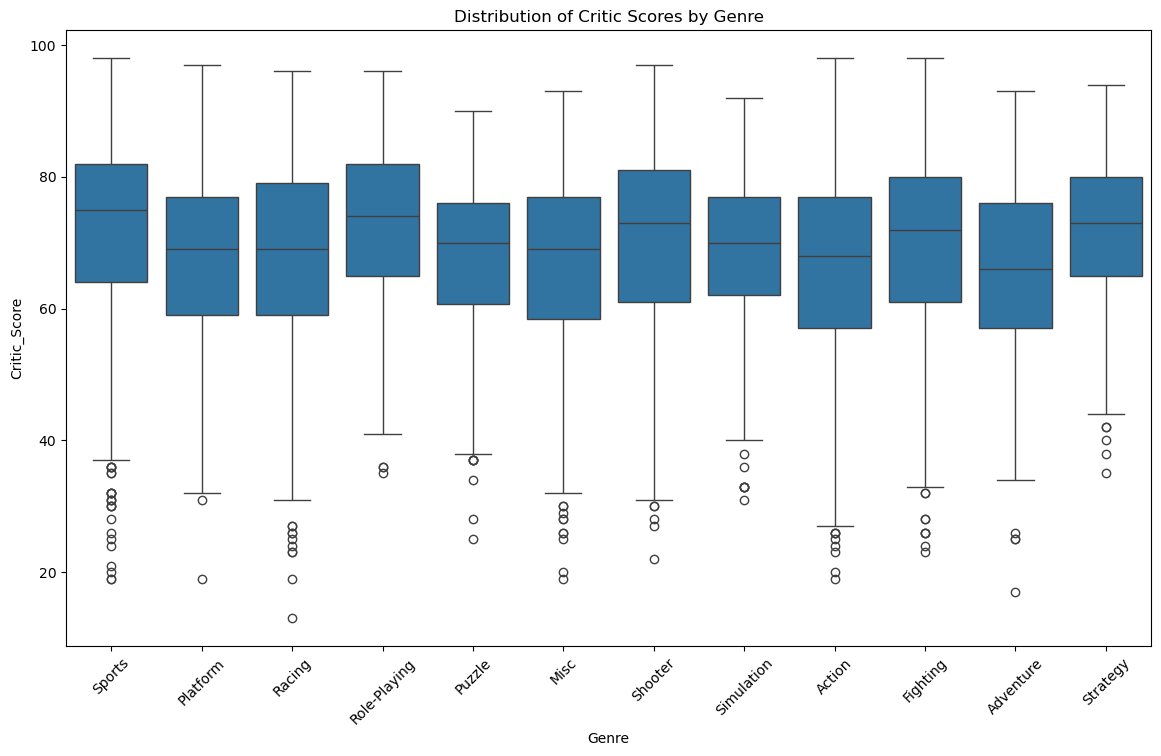

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.title('Distribution of Critic Scores by Genre')
plt.xticks(rotation=45)
plt.show()

5. Is there a correlation between critic scores and user scores for video games? Create a
scatter plot to investigate this relationship.

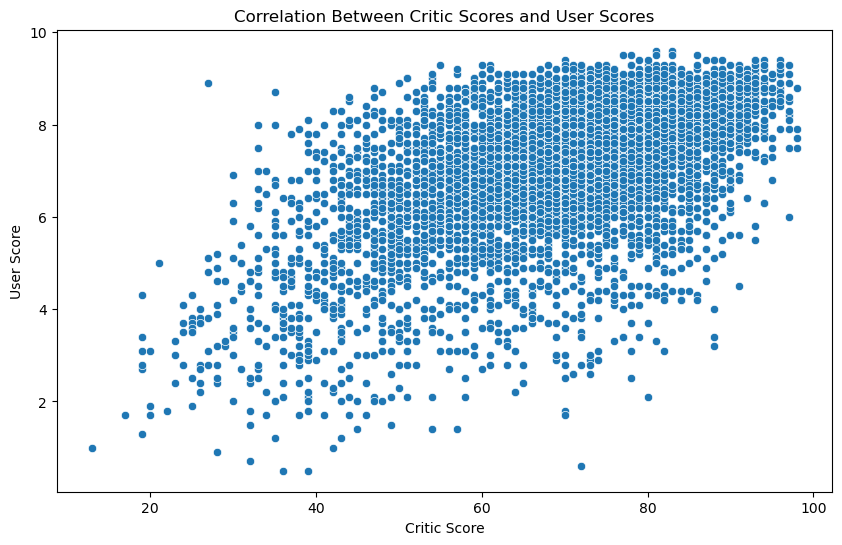

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Critic_Score', y='User_Score', data=df)
plt.title('Correlation Between Critic Scores and User Scores')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()

6. What is the average global sales for video games in each genre? Create a bar chart to
visualize the average global sales by genre.

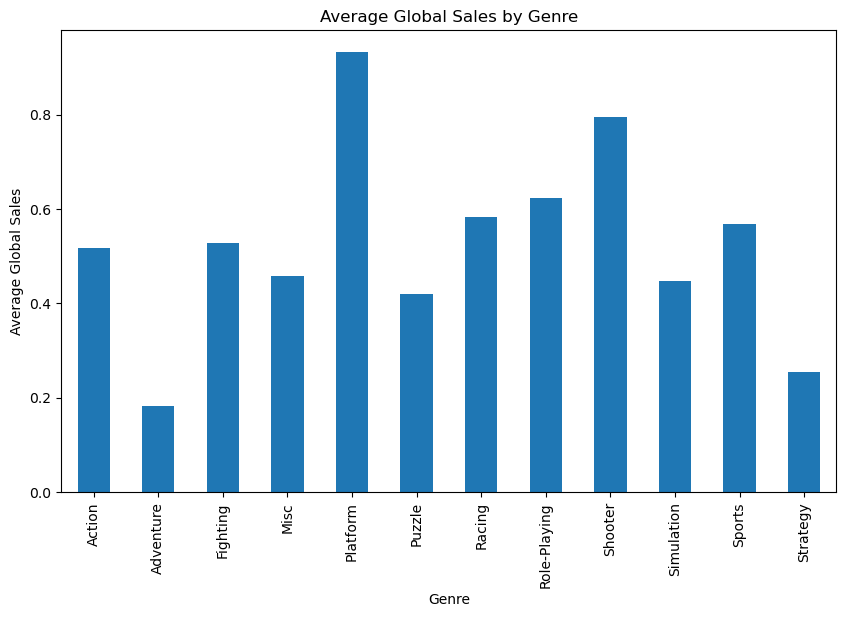

In [41]:
average_sales_by_genre = df.groupby('Genre')['Global_Sales'].mean()

plt.figure(figsize=(10, 6))
average_sales_by_genre.plot(kind='bar')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales')
plt.show()

7. How many video games were released in each year, and what were the top 5 years
with the highest number of game releases? Write a function to calculate this

In [44]:
def games_released_each_year(df):
    releases_per_year = df['Year_of_Release'].value_counts().sort_index()
    return releases_per_year

releases_per_year = games_released_each_year(df)
top_5_years = releases_per_year.nlargest(5)

print("Top 5 years with highest number of game releases:")
print(top_5_years)

Top 5 years with highest number of game releases:
Year_of_Release
2007.0    1466
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
Name: count, dtype: int64


8. How has the total global sales of video games evolved over the years in the "vgsales"
dataset? Create a line plot to visualize the trend.


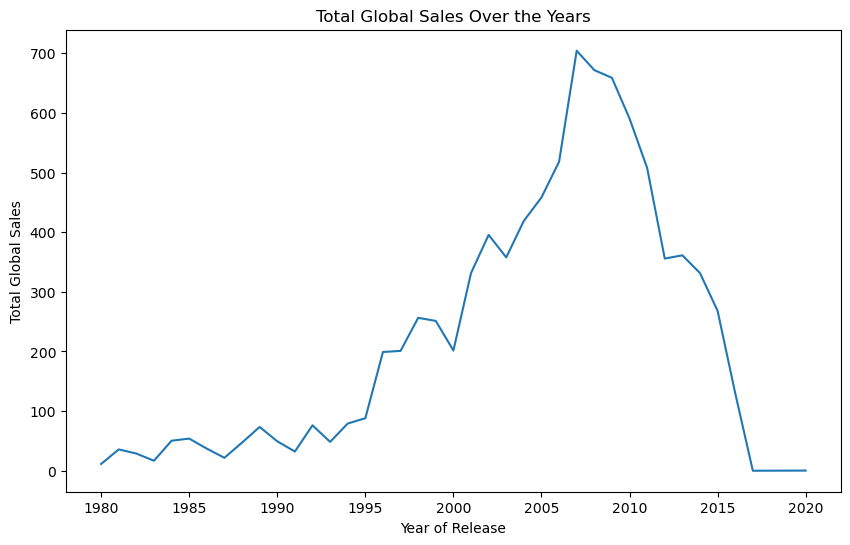

In [47]:
total_sales_per_year = df.groupby('Year_of_Release')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
total_sales_per_year.plot(kind='line')
plt.title('Total Global Sales Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales')
plt.show()

9. Visualize the correlation between global sales, critic scores, and user scores in the
"vgsales" dataset using a heatmap.

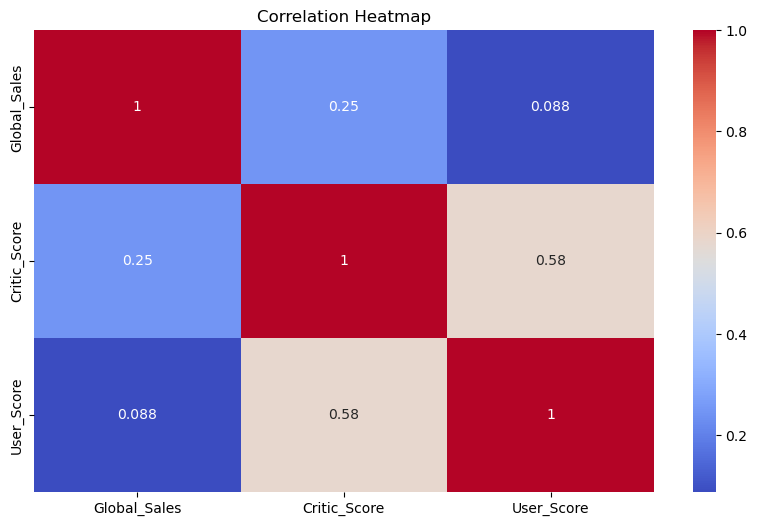

In [50]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Global_Sales', 'Critic_Score', 'User_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

10. Analyze the distribution of video game sales (e.g., global, North America, Europe,
Japan, and other regions) in the "vgsales" dataset and identify which region
contributes the most to the total sal?es

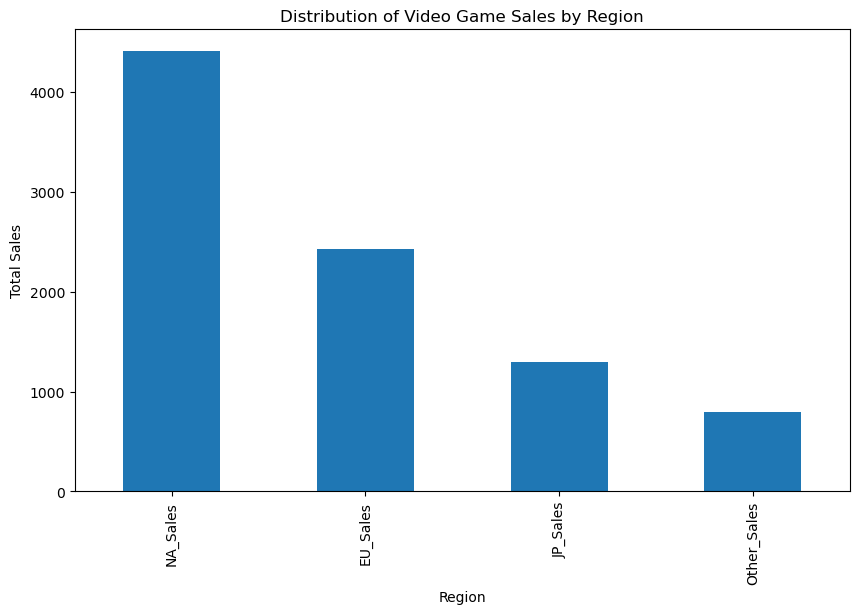

The region contributing the most to total sales is: NA_Sales


In [53]:
region_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

region_sales = df[region_sales_columns].sum()

plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar')
plt.title('Distribution of Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

max_sales_region = region_sales.idxmax()
print(f"The region contributing the most to total sales is: {max_sales_region}")